## Imports

In [13]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [14]:
def solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for it in range(nt):
        for i in range(row): un[i] = u[i]
        for k in range(row): vn[i] = v[i]  
        for j in range(2, col):
            for i in range(2, row):
                u[j-1, i-1] = un[j-1, i-1]-un[j-1, i-1]*dt/dx * (un[j-1, i-1]-un[j-1, i-2])\
                -vn[j-1, i-1]*dt/dy * (un[j-1, i-1]-un[j-2, i-1])\
                +nu*(dt/dx**2)*(un[j-1, i]-2*un[j-1, i-1]+un[j-1, i-2])\
                +nu*(dt/dy**2)*(un[j, i-1]-2*un[j-1, i-1]+un[j-2, i-1])
                v[j-1, i-1] = vn[j-1, i-1]-un[j-1, i-1]*dt/dx * (vn[j-1, i-1]-vn[j-1, i-2])\
                -vn[j-1, i-1]*dt/dy * (vn[j-1, i-1]-vn[j-2, i-1])\
                +nu*(dt/dx**2)*(vn[j-1, i]-2*vn[j-1, i-1]+vn[j-1, i-2])\
                +nu*(dt/dy**2)*(vn[j, i-1]-2*vn[j-1, i-1]+vn[j-2, i-1])

    
    
    #fill the update of u and v
        
        
    return 0

## Numba accelerator

In [15]:
@njit(fastmath=True)
def solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for it in range(nt):
        for i in range(row): un[i] = u[i]
        for k in range(row): vn[i] = v[i]  
        for j in range(2, col):
            for i in range(2, row):
                u[j-1, i-1] = un[j-1, i-1]-un[j-1, i-1]*dt/dx * (un[j-1, i-1]-un[j-1, i-2])\
                -vn[j-1, i-1]*dt/dy * (un[j-1, i-1]-un[j-2, i-1])\
                +nu*(dt/dx**2)*(un[j-1, i]-2*un[j-1, i-1]+un[j-1, i-2])\
                +nu*(dt/dy**2)*(un[j, i-1]-2*un[j-1, i-1]+un[j-2, i-1])
                v[j-1, i-1] = vn[j-1, i-1]-un[j-1, i-1]*dt/dx * (vn[j-1, i-1]-vn[j-1, i-2])\
                -vn[j-1, i-1]*dt/dy * (vn[j-1, i-1]-vn[j-2, i-1])\
                +nu*(dt/dx**2)*(vn[j-1, i]-2*vn[j-1, i-1]+vn[j-1, i-2])\
                +nu*(dt/dy**2)*(vn[j, i-1]-2*vn[j-1, i-1]+vn[j-2, i-1])

    
    #fill the update of u and v
        
        
    return 0

## Pyccel accelerator

In [16]:
@types('float[:,:]', 'float[:,:]','float[:,:]', 'float[:,:]','int','float','float','float','float')
def solve_2d_burger_pyccel(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for it in range(nt):
        for i in range(row): un[i] = u[i]
        for k in range(row): vn[i] = v[i]  
        for j in range(2, col):
            for i in range(2, row):
                u[j-1, i-1] = un[j-1, i-1]-un[j-1, i-1]*dt/dx * (un[j-1, i-1]-un[j-1, i-2])\
                -vn[j-1, i-1]*dt/dy * (un[j-1, i-1]-un[j-2, i-1])\
                +nu*(dt/dx**2)*(un[j-1, i]-2*un[j-1, i-1]+un[j-1, i-2])\
                +nu*(dt/dy**2)*(un[j, i-1]-2*un[j-1, i-1]+un[j-2, i-1])
                v[j-1, i-1] = vn[j-1, i-1]-un[j-1, i-1]*dt/dx * (vn[j-1, i-1]-vn[j-1, i-2])\
                -vn[j-1, i-1]*dt/dy * (vn[j-1, i-1]-vn[j-2, i-1])\
                +nu*(dt/dx**2)*(vn[j-1, i]-2*vn[j-1, i-1]+vn[j-1, i-2])\
                +nu*(dt/dy**2)*(vn[j, i-1]-2*vn[j-1, i-1]+vn[j-2, i-1])

    
    #fill the update of u and v
        
        
    return 0

## Inputs

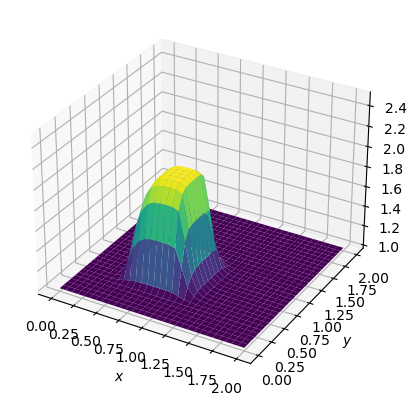

In [17]:
###variable declarations
nx = 31
ny = 31
nt = 120
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))

solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

X, Y = np.meshgrid(x, y)
fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Call Funtions

In [18]:
b = 2
a = 1 + b \
- 3 + \
b
a

2

### Pure function

In [19]:
%timeit solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

2.33 s ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [20]:
%timeit solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu)

2.65 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [21]:
solve_2d_burger_f90 = epyccel(solve_2d_burger_pyccel)

In [22]:
%timeit solve_2d_burger_f90(u, un, v, vn, nt, dt, dx, dy, nu)

1.3 ms ± 735 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
